In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 

import numpy as np

In [3]:
CSV_FILE = "qsar_biodeg.csv"
bio_csv = pd.read_csv(CSV_FILE)

In [4]:
X = bio_csv.drop(columns=["Class"])
y = bio_csv["Class"]

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Train Logistic Regression 
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
joblib.dump(log_model, "logistic_model.joblib")
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8625592417061612
              precision    recall  f1-score   support

           1       0.89      0.90      0.90       140
           2       0.80      0.79      0.79        71

    accuracy                           0.86       211
   macro avg       0.85      0.84      0.85       211
weighted avg       0.86      0.86      0.86       211



In [8]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "RandomForest_model.joblib")
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8767772511848341
              precision    recall  f1-score   support

           1       0.87      0.96      0.91       140
           2       0.89      0.72      0.80        71

    accuracy                           0.88       211
   macro avg       0.88      0.84      0.85       211
weighted avg       0.88      0.88      0.87       211



In [11]:
rf_model = joblib.load("RandomForest_model.joblib")
log_model = joblib.load("logistic_model.joblib")

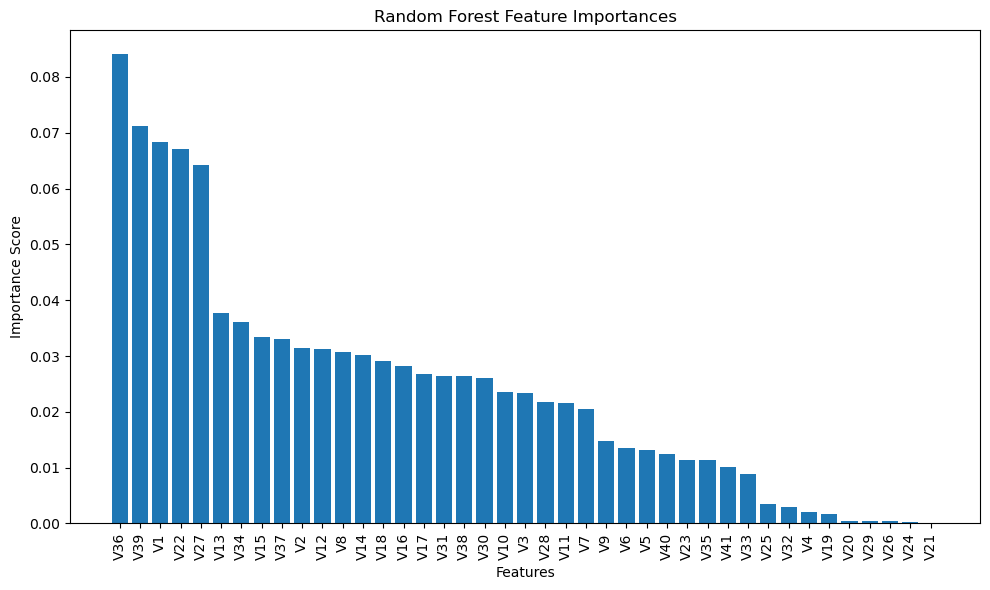

In [12]:
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
plt.title('Random Forest Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

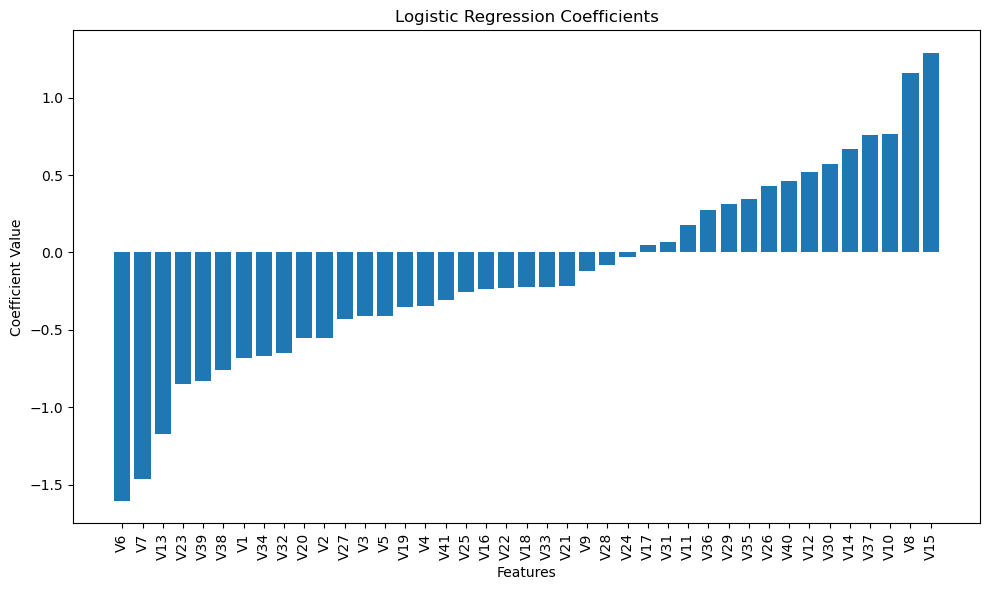

In [13]:
# Coefficient plot for Logistic Regression
coef = log_model.coef_[0]
coef_indices = coef.argsort()

plt.figure(figsize=(10, 6))
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.bar(range(X.shape[1]), coef[coef_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[coef_indices], rotation=90)
plt.tight_layout()
plt.show()